### Multiple input graph

In [24]:
import math
from typing import TypedDict, Dict, List
from langgraph.graph import StateGraph

In [30]:
class AgentState(TypedDict):
    values : List[int]
    name : str
    opr : str
    result : str

def process_values(state: AgentState) -> AgentState:
    """This functions handles the multiple inputs"""
    if state['opr'] == "+":
        state['result'] = f"Hello {state['name']} your sum is {sum(state['values'])}"
    elif state['opr']=="*":
        state['result'] = f"Hello {state['name']} your total is {math.prod(state['values'])}"
    else:
        state['result'] = "invalid"
    
    return state

In [31]:
graph = StateGraph(AgentState)
graph.add_node('processer',process_values)
graph.set_entry_point('processer')
graph.set_finish_point('processer')
app = graph.compile()

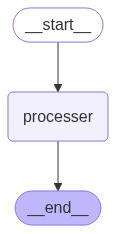

In [32]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
ans = app.invoke({"values" :[1,2,3,4],"name": "Darshan","opr" : "-"})
print(ans['result'])

invalid


In [35]:
ans = app.invoke({"values" :[1,2,3,4],"name": "Darshan","opr" : "+"})
print(ans['result'])

Hello Darshan your sum is 10


In [36]:
ans = app.invoke({"values" :[1,2,3,4],"name": "Darshan","opr" : "*"})
print(ans['result'])

Hello Darshan your total is 24
